In [2]:
import tensorflow as tf
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = tf.keras.utils.image_dataset_from_directory("data")
data = data.map(lambda x, y: (x / 255, y))
train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.20)
test_size = int(len(data) * 0.10)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 3292 files belonging to 2 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU


model = Sequential()


model.add(Dense(16, activation='relu', input_shape=(256,256,3)))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256, 256, 16)      64        
                                                                 
 flatten_1 (Flatten)         (None, 1048576)           0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1048577   
                                                                 
Total params: 1,048,641
Trainable params: 1,048,641
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
72/72 [==============================] - 44s 598ms/step - loss: 5.2282 - accuracy: 0.7704 - val_loss: 0.6704 - val_accuracy: 0.9125
Epoch 2/30
72/72 [==============================] - 49s 663ms/step - loss: 0.8482 - accuracy: 0.8863 - val_loss: 0.4060 - val_accuracy: 0.9328
Epoch 3/30
72/72 [==============================] - 47s 631ms/step - loss: 0.7449 - accuracy: 0.8911 - val_loss: 0.6268 - val_accuracy: 0.9047
Epoch 4/30
72/72 [==============================] - 51s 689ms/step - loss: 0.5660 - accuracy: 0.9084 - val_loss: 0.2444 - val_accuracy: 0.9422
Epoch 5/30
72/72 [==============================] - 49s 661ms/step - loss: 0.3711 - accuracy: 0.9240 - val_loss: 0.2590 - val_accuracy: 0.9453
Epoch 6/30
72/72 [==============================] - 51s 687ms/step - loss: 0.3837 - accuracy: 0.9167 - val_loss: 0.3121 - val_accuracy: 0.9344
Epoch 7/30
72/72 [==============================] - 48s 643ms/step - loss: 0.3399 - accuracy: 0.9253 - val_loss: 0.3578 - val_accuracy: 0.9156

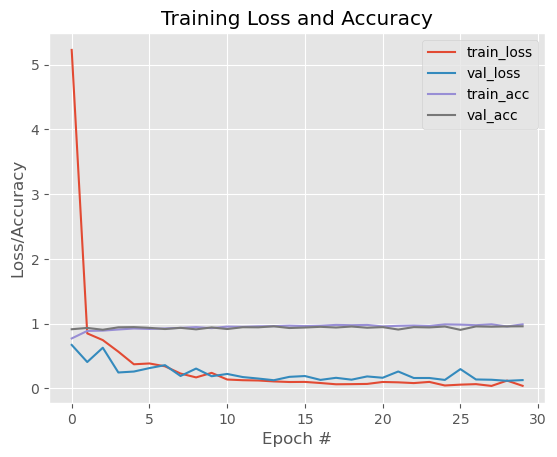

In [72]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

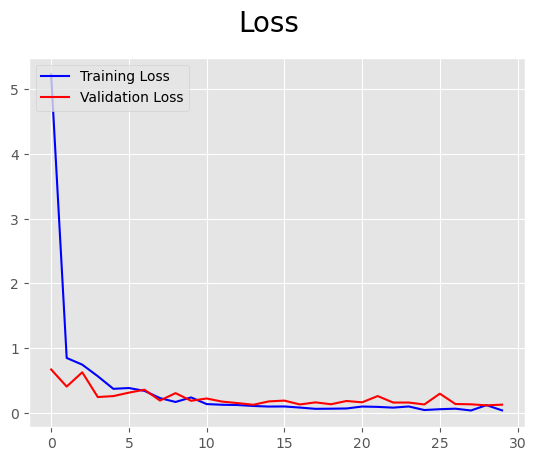

In [77]:
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()



In [76]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)
print("Precision: {:.3f}".format(pre.result().numpy()))
print("Recall: {:.3f}".format(rec.result().numpy()))
print("Accuracy: {:.3f}".format(acc.result().numpy()))

1/1 [==============================] - 0s 248ms/step
Precision: 0.939
Recall: 0.927
Accuracy: 0.931


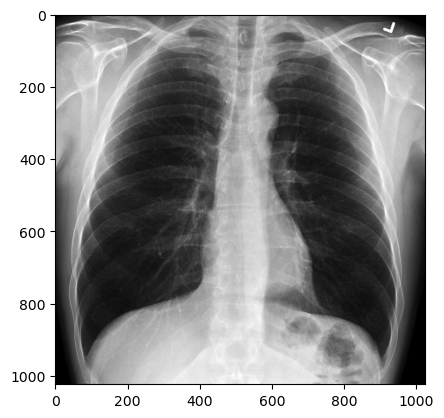

In [9]:
img = cv2.imread(r"normalexmp4.jpg")
plt.imshow(img)
plt.show()

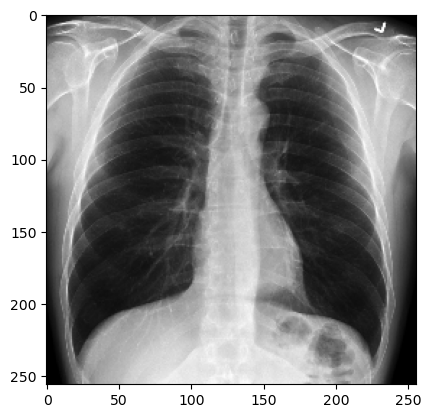

In [10]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [11]:
# np.expand_dims(resize, axis=0).shape
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 53ms/step


In [12]:
# y_pred > 0.5 # hasta
# y_pred < 0.5 # normal anlamına geliyor
y_pred

array([[2.2093325e-05]], dtype=float32)

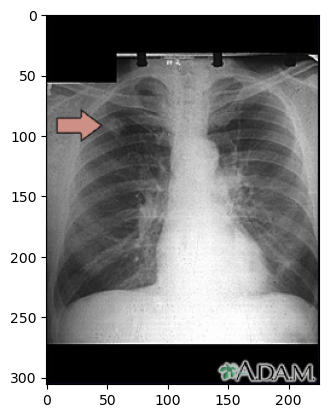

In [5]:
img = cv2.imread(r"hastaexmp4.jpg")
plt.imshow(img)
plt.show()

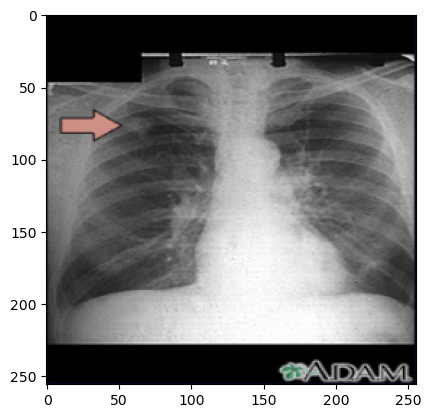

In [6]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [7]:
# np.expand_dims(resize, axis=0).shape
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 1s 615ms/step


In [8]:
# y_pred > 0.5 # hasta
# y_pred < 0.5 # normal
y_pred

array([[0.9999999]], dtype=float32)

In [70]:
from tensorflow.keras.models import load_model
import os

In [71]:
model.save(os.path.join("models", "FC(first)model.h5"))